# Tarea 1: Análisis

El equipo de EasyMoney ha decidido reorientar su estrategia hacia el aumento de la penetración de los productos actuales en el mercado, buscando mejorar la rentabilidad de la base de clientes en lugar de priorizar la captación intensiva y la personalización de los productos ofrecidos. Se busca un nuevo autoservicio de BI para mejorar la toma de decisiones.

# Carga de datos y revisiones iniciales

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# commercial_activity_df.csv
file_path = '/content/drive/My Drive/Colab Notebooks/Proyecto_Final/commercial_activity_df.csv'
comm_df = pd.read_csv(file_path,index_col=0).reset_index(drop=True)
display(comm_df.head())

# products_df.csv
file_path = '/content/drive/My Drive/Colab Notebooks/Proyecto_Final/products_df.csv'
prod_df = pd.read_csv(file_path,index_col=0).reset_index(drop=True)
display(prod_df.head())

# sociodemographic_df.csv
file_path = '/content/drive/My Drive/Colab Notebooks/Proyecto_Final/sociodemographic_df.csv'
scdm_df = pd.read_csv(file_path,index_col=0).reset_index(drop=True)
display(scdm_df.head())

pk_cid pk_partition  entry_date entry_channel  active_customer  \
0  1375586   2018-01-28  2018-01-12           KHL              1.0   
1  1050611   2018-01-28  2015-08-10           KHE              0.0   
2  1050612   2018-01-28  2015-08-10           KHE              0.0   
3  1050613   2018-01-28  2015-08-10           KHD              0.0   
4  1050614   2018-01-28  2015-08-10           KHE              1.0   

              segment  
0   02 - PARTICULARES  
1  03 - UNIVERSITARIO  
2  03 - UNIVERSITARIO  
3  03 - UNIVERSITARIO  
4  03 - UNIVERSITARIO

pk_cid pk_partition  short_term_deposit  loans  mortgage  funds  \
0  1375586   2018-01-28                   0      0         0      0   
1  1050611   2018-01-28                   0      0         0      0   
2  1050612   2018-01-28                   0      0         0      0   
3  1050613   2018-01-28                   1      0         0      0   
4  1050614   2018-01-28                   0      0         0      0   

   securities  long_term_deposit  em_account_pp  credit_card  payroll  \
0           0                  0              0            0      0.0   
1           0                  0              0            0      0.0   
2           0                  0              0            0      0.0   
3           0                  0              0            0      0.0   
4           0                  0              0            0      0.0   

   pension_plan  payroll_account  emc_account  debit_card  em_account_p  \
0           0.0                0            0           0             0   
1           0.0                0            0           0             0   
2           0.0                0            0           0             0   
3           0.0                0            0           0             0   
4           0.0                0            0           0             0   

   em_acount  
0          1  
1          1  
2          1  
3          0  
4          1

pk_cid pk_partition country_id  region_code gender  age deceased  \
0  1375586   2018-01-28         ES         29.0      H   35        N   
1  1050611   2018-01-28         ES         13.0      V   23        N   
2  1050612   2018-01-28         ES         13.0      V   23        N   
3  1050613   2018-01-28         ES         50.0      H   22        N   
4  1050614   2018-01-28         ES         50.0      V   23        N   

      salary  
0   87218.10  
1   35548.74  
2  122179.11  
3  119775.54  
4        NaN

In [ ]:
np.random.seed(42)

In [ ]:
# Verificamos el tamaño de los dfs, validando que todos tienen la misma cantidad de entradas

print(f"comm_df tiene {comm_df.shape[0]} filas y {comm_df.shape[1]} columnas")
print(f"prod_df tiene {prod_df.shape[0]} filas y {prod_df.shape[1]} columnas")
print(f"scdm_df tiene {scdm_df.shape[0]} filas y {scdm_df.shape[1]} columnas")

comm_df tiene 5962924 filas y 6 columnas
prod_df tiene 5962924 filas y 17 columnas
scdm_df tiene 5962924 filas y 8 columnas


In [ ]:
# Verificamos el # de filas duplicadas

print(f"comm_df tiene {comm_df.duplicated().sum()} filas duplicadas")
print(f"prod_df tiene {prod_df.duplicated().sum()} filas duplicadas")
print(f"scdm_df tiene {scdm_df.duplicated().sum()} filas duplicadas")

comm_df tiene 0 filas duplicadas
prod_df tiene 0 filas duplicadas
scdm_df tiene 0 filas duplicadas


In [ ]:
# Verificamos los ID's unicos, confirmamos que casi todas las base están duplicadas en el mismo numero de entradas.
# Esto lo arreglaremos a futuro, comparando primero algunos casos, ya que al tener cero filas duplicadas, pero
# con tantos duplicados puede indicar que hubo un error en esa columna. Se trabajará en una futura sección.

print(f"comm_df tiene {comm_df['pk_cid'].duplicated().sum()} filas duplicadas")
print(f"prod_df tiene {prod_df['pk_cid'].duplicated().sum()} filas duplicadas")
print(f"scdm_df tiene {scdm_df['pk_cid'].duplicated().sum()} filas duplicadas")

comm_df tiene 5506551 filas duplicadas
prod_df tiene 5506551 filas duplicadas
scdm_df tiene 5506551 filas duplicadas


#### Revision de Dataset - comm_df

In [ ]:
# Empezamos revisando el primer df. Concluimos que el primer df esta relacionado a información comercial de los
# clientes, tal como: su id unico, su fecha de ingreso, que canal de entrada tuvieron, si están activos o no y
# a que segmento pertenecen
comm_df

pk_cid pk_partition  entry_date entry_channel  active_customer  \
0        1375586   2018-01-28  2018-01-12           KHL              1.0   
1        1050611   2018-01-28  2015-08-10           KHE              0.0   
2        1050612   2018-01-28  2015-08-10           KHE              0.0   
3        1050613   2018-01-28  2015-08-10           KHD              0.0   
4        1050614   2018-01-28  2015-08-10           KHE              1.0   
...          ...          ...         ...           ...              ...   
5962919  1166765   2019-05-28  2016-08-14           KHE              0.0   
5962920  1166764   2019-05-28  2016-08-14           KHE              0.0   
5962921  1166763   2019-05-28  2016-08-14           KHE              1.0   
5962922  1166789   2019-05-28  2016-08-14           KHE              0.0   
5962923  1550586   2019-05-28  2019-05-13           NaN              1.0   

                    segment  
0         02 - PARTICULARES  
1        03 - UNIVERSITARIO  
2        03 - UNIVERSITARIO  
3        03 - UNIVERSITARIO  
4        03 - UNIVERSITARIO  
...                     ...  
5962919  03 - UNIVERSITARIO  
5962920  03 - UNIVERSITARIO  
5962921   02 - PARTICULARES  
5962922  03 - UNIVERSITARIO  
5962923                 NaN  

[5962924 rows x 6 columns]

In [ ]:
comm_df['pk_cid'].nunique()

456373

In [ ]:
comm_df.info()

# Validamos los dtype de comm_df y notamos que hay cambios que se deben realizar a varias de las columnas (datetime y categóricas)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   pk_cid           int64  
 1   pk_partition     object 
 2   entry_date       object 
 3   entry_channel    object 
 4   active_customer  float64
 5   segment          object 
dtypes: float64(1), int64(1), object(4)
memory usage: 273.0+ MB


In [ ]:
pd.set_option('display.float_format', '{:.0f}'.format)
comm_df.describe(include = 'all')

# De esta vista podemos extrapolar algunos datos como número de entradas y numero de datos únicos para varias columnas
# (pudiendo imaginar posibles categorizaciones). Sin embargo la data de este df es mayormente de naturaleza categórica
# por lo que no podremos extrapolar datos numéricos ambiguos.

pk_cid pk_partition  entry_date entry_channel  active_customer  \
count  5962924      5962924     5962924       5829891          5962924   
unique     NaN           17        1499            68              NaN   
top        NaN   2019-05-28  2017-07-28           KHE              NaN   
freq       NaN       442995       57389       3113947              NaN   
mean   1234930          NaN         NaN           NaN                0   
std     162302          NaN         NaN           NaN                0   
min      15891          NaN         NaN           NaN                0   
25%    1112532          NaN         NaN           NaN                0   
50%    1231097          NaN         NaN           NaN                0   
75%    1352339          NaN         NaN           NaN                1   
max    1553689          NaN         NaN           NaN                1   

                   segment  
count              5828980  
unique                   3  
top     03 - UNIVERSITARIO  
freq               3900166  
mean                   NaN  
std                    NaN  
min                    NaN  
25%                    NaN  
50%                    NaN  
75%                    NaN  
max                    NaN

#### Revisión de Dataset -  prod_df

In [ ]:
# Continuamos con prod_df. Se evidencia que este df está relacionado a los productos que tiene cada uno de los clientes
# Estimamos como columnas de identificacion para el join: pk_cid.
prod_df

pk_cid pk_partition  short_term_deposit  loans  mortgage  funds  \
0        1375586   2018-01-28                   0      0         0      0   
1        1050611   2018-01-28                   0      0         0      0   
2        1050612   2018-01-28                   0      0         0      0   
3        1050613   2018-01-28                   1      0         0      0   
4        1050614   2018-01-28                   0      0         0      0   
...          ...          ...                 ...    ...       ...    ...   
5962919  1166765   2019-05-28                   0      0         0      0   
5962920  1166764   2019-05-28                   0      0         0      0   
5962921  1166763   2019-05-28                   0      0         0      0   
5962922  1166789   2019-05-28                   0      0         0      0   
5962923  1550586   2019-05-28                   0      0         0      0   

         securities  long_term_deposit  em_account_pp  credit_card  payroll  \
0                 0                  0              0            0        0   
1                 0                  0              0            0        0   
2                 0                  0              0            0        0   
3                 0                  0              0            0        0   
4                 0                  0              0            0        0   
...             ...                ...            ...          ...      ...   
5962919           0                  0              0            0        0   
5962920           0                  0              0            0        0   
5962921           0                  0              0            0        0   
5962922           0                  0              0            0        0   
5962923           0                  0              0            0        0   

         pension_plan  payroll_account  emc_account  debit_card  em_account_p  \
0                   0                0            0           0             0   
1                   0                0            0           0             0   
2                   0                0            0           0             0   
3                   0                0            0           0             0   
4                   0                0            0           0             0   
...               ...              ...          ...         ...           ...   
5962919             0                0            0           0             0   
5962920             0                0            0           0             0   
5962921             0                0            0           0             0   
5962922             0                0            0           0             0   
5962923             0                0            0           0             0   

         em_acount  
0                1  
1                1  
2                1  
3                0  
4                1  
...            ...  
5962919          1  
5962920          1  
5962921          1  
5962922          1  
5962923          1  

[5962924 rows x 17 columns]

In [ ]:
prod_df.info()

# Validamos los dtype de prod_df y notamos que tendremos que verificar porque payroll y pension_plan tienen un dtype
# diferente, considerando que preliminarmente esta base parece categorizar de manera binaria, por lo que de entrada
# todos debiesen ser del mismo tipo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 17 columns):
 #   Column              Dtype  
---  ------              -----  
 0   pk_cid              int64  
 1   pk_partition        object 
 2   short_term_deposit  int64  
 3   loans               int64  
 4   mortgage            int64  
 5   funds               int64  
 6   securities          int64  
 7   long_term_deposit   int64  
 8   em_account_pp       int64  
 9   credit_card         int64  
 10  payroll             float64
 11  pension_plan        float64
 12  payroll_account     int64  
 13  emc_account         int64  
 14  debit_card          int64  
 15  em_account_p        int64  
 16  em_acount           int64  
dtypes: float64(2), int64(14), object(1)
memory usage: 773.4+ MB


In [ ]:
prod_df.describe(include = 'all')

# No se observa ningún dato de relevancia en este describe, más allá que la visibilización de algunos pocos nulos
# en dos de las columnas (payroll y pension_plan)

pk_cid pk_partition  short_term_deposit   loans  mortgage   funds  \
count  5962924      5962924             5962924 5962924   5962924 5962924   
unique     NaN           17                 NaN     NaN       NaN     NaN   
top        NaN   2019-05-28                 NaN     NaN       NaN     NaN   
freq       NaN       442995                 NaN     NaN       NaN     NaN   
mean   1234930          NaN                   0       0         0       0   
std     162302          NaN                   0       0         0       0   
min      15891          NaN                   0       0         0       0   
25%    1112532          NaN                   0       0         0       0   
50%    1231097          NaN                   0       0         0       0   
75%    1352339          NaN                   0       0         0       0   
max    1553689          NaN                   1       1         1       1   

        securities  long_term_deposit  em_account_pp  credit_card  payroll  \
count      5962924            5962924        5962924      5962924  5962863   
unique         NaN                NaN            NaN          NaN      NaN   
top            NaN                NaN            NaN          NaN      NaN   
freq           NaN                NaN            NaN          NaN      NaN   
mean             0                  0              0            0        0   
std              0                  0              0            0        0   
min              0                  0              0            0        0   
25%              0                  0              0            0        0   
50%              0                  0              0            0        0   
75%              0                  0              0            0        0   
max              1                  1              0            1        1   

        pension_plan  payroll_account  emc_account  debit_card  em_account_p  \
count        5962863          5962924      5962924     5962924       5962924   
unique           NaN              NaN          NaN         NaN           NaN   
top              NaN              NaN          NaN         NaN           NaN   
freq             NaN              NaN          NaN         NaN           NaN   
mean               0                0            0           0             0   
std                0                0            0           0             0   
min                0                0            0           0             0   
25%                0                0            0           0             0   
50%                0                0            0           0             0   
75%                0                0            0           0             0   
max                1                1            1           1             1   

        em_acount  
count     5962924  
unique        NaN  
top           NaN  
freq          NaN  
mean            1  
std             0  
min             0  
25%             0  
50%             1  
75%             1  
max             1

#### Revisón de Dataset - scdm_df

In [ ]:
# Seguimos con scdm_df. Por el nombre y por la data este df esta relacionado a los datos socio-demográficos de los usuarios.
# Esto nos servirá para una mejor segmentación y clasificacion para las recomendaciones.
scdm_df

pk_cid pk_partition country_id  region_code gender  age deceased  \
0        1375586   2018-01-28         ES           29      H   35        N   
1        1050611   2018-01-28         ES           13      V   23        N   
2        1050612   2018-01-28         ES           13      V   23        N   
3        1050613   2018-01-28         ES           50      H   22        N   
4        1050614   2018-01-28         ES           50      V   23        N   
...          ...          ...        ...          ...    ...  ...      ...   
5962919  1166765   2019-05-28         ES           50      V   22        N   
5962920  1166764   2019-05-28         ES           26      V   23        N   
5962921  1166763   2019-05-28         ES           50      H   47        N   
5962922  1166789   2019-05-28         ES           50      H   22        N   
5962923  1550586   2019-05-28         ES           28      H   37        N   

         salary  
0         87218  
1         35549  
2        122179  
3        119776  
4           NaN  
...         ...  
5962919   43912  
5962920   23335  
5962921     NaN  
5962922  199593  
5962923     NaN  

[5962924 rows x 8 columns]

In [ ]:
scdm_df.info()

# Validamos los dtype de scdm_df y notamos que las columnas requerirán ajustes de objetos a categorias y de floats a int
# Adicionalmente validamos que contamos con la columna de id

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   pk_cid        int64  
 1   pk_partition  object 
 2   country_id    object 
 3   region_code   float64
 4   gender        object 
 5   age           int64  
 6   deceased      object 
 7   salary        float64
dtypes: float64(2), int64(2), object(4)
memory usage: 363.9+ MB


In [ ]:
scdm_df.describe(include = 'all')

# En esta revisión si encontramos algunos datos interesantes a revisar como: el salario maximo es de casi 29 millones
# y el minimo de 1200€. La media se ve un tanto sesgada por ese salario maximo en relacion a la mediana. También las
# edades mínimas y máximas parecen erroneas (2 y 105 años)

pk_cid pk_partition country_id  region_code   gender     age deceased  \
count  5962924      5962924    5962924      5960660  5962899 5962924  5962924   
unique     NaN           17         41          NaN        2     NaN        2   
top        NaN   2019-05-28         ES          NaN        H     NaN        N   
freq       NaN       442995    5960672          NaN  3087502     NaN  5961849   
mean   1234930          NaN        NaN           26      NaN      30      NaN   
std     162302          NaN        NaN           14      NaN      12      NaN   
min      15891          NaN        NaN            1      NaN       2      NaN   
25%    1112532          NaN        NaN           13      NaN      22      NaN   
50%    1231097          NaN        NaN           28      NaN      25      NaN   
75%    1352339          NaN        NaN           36      NaN      34      NaN   
max    1553689          NaN        NaN           52      NaN     105      NaN   

         salary  
count   4450821  
unique      NaN  
top         NaN  
freq        NaN  
mean     115817  
std      199552  
min        1203  
25%       61501  
50%       88655  
75%      131670  
max    28894396

#### Verificación Preliminar de Nulos

Con el proposito de hacer una validación preliminar de la salud de los dfs de acuerdo a sus valores nulos. También para validar si es necesaria cualquier imputación antes de realizar la unificación de los dfs

In [ ]:
# Verificamos primero cuales columnas y cuantos valores estan nulos en cada columna.
# Observamos similitudes entre el numero de nulos para los nulos de comm_df y prod_df, por lo que valdría la pena
# verificar si los nulos pertenecen a las mismas personas en esos casos

print("Columnas con datos nulos en comm_df:")
print(comm_df.isna().sum()[comm_df.isna().sum() > 0])

print("\nColumnas con datos nulos en prod_df:")
print(prod_df.isna().sum()[prod_df.isna().sum() > 0])

print("\nColumnas con datos nulos en scdm_df:")
print(scdm_df.isna().sum()[scdm_df.isna().sum() > 0])

Columnas con datos nulos en comm_df:
entry_channel    133033
segment          133944
dtype: int64

Columnas con datos nulos en prod_df:
payroll         61
pension_plan    61
dtype: int64

Columnas con datos nulos en scdm_df:
region_code       2264
gender              25
salary         1512103
dtype: int64


In [ ]:
# En el caso de prod_df extraemos un sample de las dos columnas y notamos que tanto payroll como pension_plan
# comparten los mismos usuarios, lo que puede hacer sentido ya que si no hay ingreso salarial, posiblemente
# no haya inversion en un fondo de pensiones
prod_df[prod_df[['payroll', 'pension_plan']].isna().any(axis=1)][['pk_cid', 'payroll', 'pension_plan']].sample(n=25, random_state=42)

pk_cid  payroll  pension_plan
20679    1023793      NaN           NaN
109240   1255266      NaN           NaN
831368   1379131      NaN           NaN
486224   1221067      NaN           NaN
186193   1135705      NaN           NaN
1140327  1342015      NaN           NaN
514813   1237715      NaN           NaN
923439   1135961      NaN           NaN
175373   1177738      NaN           NaN
662834   1083617      NaN           NaN
513984   1239163      NaN           NaN
1199121  1251445      NaN           NaN
216729   1241619      NaN           NaN
56072    1118340      NaN           NaN
1107155  1377542      NaN           NaN
254940   1192352      NaN           NaN
138471   1365111      NaN           NaN
133623   1376688      NaN           NaN
738304   1221067      NaN           NaN
102989   1266281      NaN           NaN
751422   1254953      NaN           NaN
274021   1221067      NaN           NaN
859723   1269364      NaN           NaN
1023498  1111563      NaN           NaN
354455   1360396      NaN           NaN

In [ ]:
#En el caso de comm_df notamos que tanto entry channel como segment parecen compartir los mismos nulos en el 96%
#de las veces (24/25).
comm_df[comm_df[['entry_channel', 'segment']].isna().any(axis=1)][['pk_cid', 'entry_channel', 'segment']].sample(n=25, random_state=42)

pk_cid entry_channel            segment
1797515  1415924           NaN                NaN
2494445  1451028           NaN                NaN
2798310  1481409           NaN                NaN
2526970  1441113           NaN                NaN
2792934  1494483           NaN                NaN
2790051  1490254           NaN                NaN
1678372  1269218           NaN  02 - PARTICULARES
2501415  1461296           NaN                NaN
1793641  1416199           NaN                NaN
2485194  1373286           KHK                NaN
2998522  1499122           NaN                NaN
4881476  1539761           NaN                NaN
2498201  1442740           NaN                NaN
4388956  1531495           NaN                NaN
2998259  1509423           NaN                NaN
1802130  1420862           NaN                NaN
2790108  1491461           NaN                NaN
2996105  1511814           NaN                NaN
3004372  1500811           NaN                NaN
1802233  1419701           NaN                NaN
2508167  1454467           NaN                NaN
4389247  1535202           NaN                NaN
1953997  1436731           NaN                NaN
2981686  1496421           NaN                NaN
2499170  1447768           NaN                NaN

In [ ]:
# En el caso de scdm_df notamos que los nulos de salary no tienen nulos en las demás columnas con nulos de este
# dataset.
scdm_df[scdm_df[['region_code', 'gender', 'salary']].isna().any(axis=1)][['pk_cid', 'region_code', 'gender', 'salary']].sample(n=25, random_state=42)

pk_cid  region_code gender  salary
300282   1182520            4      H     NaN
1378387  1342908            3      H     NaN
5084321  1532032           10      H     NaN
1907075  1280266           15      V     NaN
2097476  1191812           46      H     NaN
4053879  1230045           30      V     NaN
4285770  1229112           23      V     NaN
4360843  1490519           50      H     NaN
5188185  1070728           47      V     NaN
3871727  1513448           28      H     NaN
3642944  1476116           36      V     NaN
4360981  1490081           28      V     NaN
3900926  1334348           41      V     NaN
5110295  1489025           35      H     NaN
3846837  1494805           28      V     NaN
4086370  1200925           28      V     NaN
4435936  1376788            7      H     NaN
3441839  1261715           48      V     NaN
814316   1352809           41      H     NaN
3637319  1456565           35      V     NaN
3865427  1485740           18      H     NaN
4408094  1506474           30      V     NaN
618425   1314499           15      V     NaN
1172049  1149022           43      H     NaN
3821832  1470531           13      V     NaN

En este caso sería pertinente ver si es adecuado imputar esos nulos o eliminarlos. Esto debido a que la naturaleza de los datos es binaria y la naturaleza de las tareas es de clasificación  y segmentacion (por medio de sociodemográficos, productos, etc); por lo que usar técnicas de imputación simples como
media/mediana, podría sesgar la clasificación de cierto grupos.

Posiblemente lo ideal sería verificar las otras categorías de estos usuarios y usar sus semejantes para imputar
los nulos. Sin embargo esto puede generar una cantidad considerable de trabajo que quizás nos valga la pena considerando que en el contexto del tamaño de la data, son solo un pequeño %. Se podría verificar si estos nulos pertenecen a grupos 'underrepresented' para entender si su eliminación generaría una perdida de contexto importante

# Unificación de Datasets

Una vez validados los 3 datasets con respecto a: la función de cada uno, la homogenidad en la estructura de sus columnas (específicamente las de identificacion), y a una calidad de datos inicial aceptable, procedemos a unificar los datasets. Esto lo realizamos antes de cualquier otro pre-procesamiento (chequeo y remoción de duplicados, e imputación de Nulos) para evitar inconsistencias en los datos a unificar, y para mayor eficiencia al momento de preprocesar (se realiza una vez cada uno en vez de 3 veces)

In [ ]:
df_1=comm_df.merge(prod_df, on = ['pk_cid','pk_partition'], how = 'inner')
df_base=df_1.merge(scdm_df, on = ['pk_cid','pk_partition'], how = 'inner')
df_base

pk_cid pk_partition  entry_date entry_channel  active_customer  \
0        1375586   2018-01-28  2018-01-12           KHL                1   
1        1050611   2018-01-28  2015-08-10           KHE                0   
2        1050612   2018-01-28  2015-08-10           KHE                0   
3        1050613   2018-01-28  2015-08-10           KHD                0   
4        1050614   2018-01-28  2015-08-10           KHE                1   
...          ...          ...         ...           ...              ...   
5962919  1166765   2019-05-28  2016-08-14           KHE                0   
5962920  1166764   2019-05-28  2016-08-14           KHE                0   
5962921  1166763   2019-05-28  2016-08-14           KHE                1   
5962922  1166789   2019-05-28  2016-08-14           KHE                0   
5962923  1550586   2019-05-28  2019-05-13           NaN                1   

                    segment  short_term_deposit  loans  mortgage  funds  ...  \
0         02 - PARTICULARES                   0      0         0      0  ...   
1        03 - UNIVERSITARIO                   0      0         0      0  ...   
2        03 - UNIVERSITARIO                   0      0         0      0  ...   
3        03 - UNIVERSITARIO                   1      0         0      0  ...   
4        03 - UNIVERSITARIO                   0      0         0      0  ...   
...                     ...                 ...    ...       ...    ...  ...   
5962919  03 - UNIVERSITARIO                   0      0         0      0  ...   
5962920  03 - UNIVERSITARIO                   0      0         0      0  ...   
5962921   02 - PARTICULARES                   0      0         0      0  ...   
5962922  03 - UNIVERSITARIO                   0      0         0      0  ...   
5962923                 NaN                   0      0         0      0  ...   

         emc_account  debit_card  em_account_p  em_acount  country_id  \
0                  0           0             0          1          ES   
1                  0           0             0          1          ES   
2                  0           0             0          1          ES   
3                  0           0             0          0          ES   
4                  0           0             0          1          ES   
...              ...         ...           ...        ...         ...   
5962919            0           0             0          1          ES   
5962920            0           0             0          1          ES   
5962921            0           0             0          1          ES   
5962922            0           0             0          1          ES   
5962923            0           0             0          1          ES   

         region_code  gender  age  deceased  salary  
0                 29       H   35         N   87218  
1                 13       V   23         N   35549  
2                 13       V   23         N  122179  
3                 50       H   22         N  119776  
4                 50       V   23         N     NaN  
...              ...     ...  ...       ...     ...  
5962919           50       V   22         N   43912  
5962920           26       V   23         N   23335  
5962921           50       H   47         N     NaN  
5962922           50       H   22         N  199593  
5962923           28       H   37         N     NaN  

[5962924 rows x 27 columns]

## Ajuste de Dtypes

In [ ]:
# Verificamos la info de todas las bases unificadas, definimos realizar algunos ajustes
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 27 columns):
 #   Column              Dtype  
---  ------              -----  
 0   pk_cid              int64  
 1   pk_partition        object 
 2   entry_date          object 
 3   entry_channel       object 
 4   active_customer     float64
 5   segment             object 
 6   short_term_deposit  int64  
 7   loans               int64  
 8   mortgage            int64  
 9   funds               int64  
 10  securities          int64  
 11  long_term_deposit   int64  
 12  em_account_pp       int64  
 13  credit_card         int64  
 14  payroll             float64
 15  pension_plan        float64
 16  payroll_account     int64  
 17  emc_account         int64  
 18  debit_card          int64  
 19  em_account_p        int64  
 20  em_acount           int64  
 21  country_id          object 
 22  region_code         float64
 23  gender              object 
 24  age                 int6

In [ ]:
df_base.gender=df_base.gender.map({'H':1,'V':0})
df_base.deceased=df_base.deceased.map({'S':1,'N':0})

In [ ]:
# Para evitar posibles errores con los nulos al cambiar el tipo de datos los rellenamos primero. Unknown para las categóricas y 0 para las numéricas.
df_base=df_base.fillna({
    'entry_channel': 'Unknown',
    'segment': 'Unknown',
    'payroll': 0,
    'pension_plan': 0,
    'region_code': -1,
    'gender': 0
})
df_base.head()

pk_cid pk_partition  entry_date entry_channel  active_customer  \
0  1375586   2018-01-28  2018-01-12           KHL                1   
1  1050611   2018-01-28  2015-08-10           KHE                0   
2  1050612   2018-01-28  2015-08-10           KHE                0   
3  1050613   2018-01-28  2015-08-10           KHD                0   
4  1050614   2018-01-28  2015-08-10           KHE                1   

              segment  short_term_deposit  loans  mortgage  funds  ...  \
0   02 - PARTICULARES                   0      0         0      0  ...   
1  03 - UNIVERSITARIO                   0      0         0      0  ...   
2  03 - UNIVERSITARIO                   0      0         0      0  ...   
3  03 - UNIVERSITARIO                   1      0         0      0  ...   
4  03 - UNIVERSITARIO                   0      0         0      0  ...   

   emc_account  debit_card  em_account_p  em_acount  country_id  region_code  \
0            0           0             0          1          ES           29   
1            0           0             0          1          ES           13   
2            0           0             0          1          ES           13   
3            0           0             0          0          ES           50   
4            0           0             0          1          ES           50   

   gender  age  deceased  salary  
0       1   35         0   87218  
1       0   23         0   35549  
2       0   23         0  122179  
3       1   22         0  119776  
4       0   23         0     NaN  

[5 rows x 27 columns]

In [ ]:
df_base.gender.isna().sum()

np.int64(0)

In [ ]:
df_base.deceased.isna().sum()

np.int64(0)

In [ ]:
# Debido a algunos errores en las fechas nos podemos convertir directamente las columnas de fechas a datetime.
# realizaremos una exploración de estos errores previo a la imputación de otros errores

invalid_dates = df_base['entry_date'][~pd.to_datetime(df_base['entry_date'], errors='coerce').notna()]
print(f'Los valores errones son', invalid_dates.unique())
print(f'El número de valores errones son', invalid_dates.count())

Los valores errones son ['2015-02-29' '2019-02-29']
El número de valores errones son 6413


In [ ]:
# Corregimos los valores erroneos
df_base['entry_date'] = df_base['entry_date'].replace({'2015-02-29': '2015-02-28', '2019-02-29': '2019-02-28'})

In [ ]:
datetime_columns = ['pk_partition', 'entry_date']
df_base[datetime_columns] = df_base[datetime_columns].apply(pd.to_datetime)

In [ ]:
for col in df_base.select_dtypes(include='object').columns:
    print(col,df_base[col].nunique())

entry_channel 69
segment 4
country_id 41


In [ ]:
# Pasamos las tipo object a category para ahorrar memoria.
df_base[df_base.select_dtypes(include='object').columns]=df_base[df_base.select_dtypes(include='object').columns].astype('category')

In [ ]:
# La variable ID se pasa a object por el mismo motivo anterior.
df_base['pk_cid'] = df_base['pk_cid'].astype('object')

In [ ]:
df_base.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 27 columns):
 #   Column              Dtype         
---  ------              -----         
 0   pk_cid              object        
 1   pk_partition        datetime64[ns]
 2   entry_date          datetime64[ns]
 3   entry_channel       category      
 4   active_customer     float64       
 5   segment             category      
 6   short_term_deposit  int64         
 7   loans               int64         
 8   mortgage            int64         
 9   funds               int64         
 10  securities          int64         
 11  long_term_deposit   int64         
 12  em_account_pp       int64         
 13  credit_card         int64         
 14  payroll             float64       
 15  pension_plan        float64       
 16  payroll_account     int64         
 17  emc_account         int64         
 18  debit_card          int64         
 19  em_account_p        int64         
 20  em

## Verificación e Imputación de Duplicados y Nulos

#### Remoción de Duplicados

In [ ]:
# Revisamos si hay filas duplicadas en la base
df_base.duplicated().sum()

np.int64(0)

In [ ]:
# Verificamos que los IDs sean únicos y notamos que casi toda la base esta usando los mismos IDs
print(f"df_base tiene {df_base['pk_cid'].duplicated().sum()} ID's duplicados")

df_base tiene 5506551 ID's duplicados


In [ ]:
# Verificamos la cantidad de entradas unicas en la columna pk_cid, notando que se usan 456373 ID's para toda la base
df_base['pk_cid'].value_counts()


pk_cid
538545     17
538902     17
539016     17
538736     17
538227     17
           ..
1138332     1
1141426     1
1152823     1
1151850     1
1147267     1
Name: count, Length: 456373, dtype: int64

### Validación e Imputación de Nulos

In [ ]:
print("Columnas con datos nulos en df_base:")

# Calcular el número total de filas en el DataFrame
total_rows = len(df_base)

# Calcular el número y porcentaje de nulos por columna
null_summary = df_base.isna().sum()[df_base.isna().sum() > 0].to_frame(name='Nulos')
null_summary['% del total'] = (null_summary['Nulos'] / total_rows) * 100

# Formatear la columna de porcentaje a dos decimales
null_summary['% del total'] = null_summary['% del total'].map("{:.2f}%".format)

# Mostrar el resumen
print(null_summary)

Columnas con datos nulos en df_base:
          Nulos % del total
salary  1512103      25.36%


De acuerdo a estos datos la columna más afectada es la de salary con un 25.36% de datos nulos, los cuales deben ser imputados para no perder data necesaria.

El resto de nulos se imputaron anteriormente.

In [ ]:
# Hacemos una muestra de 25 entradas aleatorias de las columnas con nulos para analizar comonalidades
columnas_nan = null_summary.index.tolist()
muestra_nan = df_base[df_base[columnas_nan].isna().any(axis=1)][['pk_cid', 'pk_partition'] + columnas_nan].sample(n=25, random_state=42)
pd.DataFrame(muestra_nan)


pk_cid pk_partition  salary
1260885  1039368   2018-06-28     NaN
5261151  1016844   2019-04-28     NaN
4403197  1497754   2019-02-28     NaN
1091862  1271685   2018-05-28     NaN
4350862  1477155   2019-02-28     NaN
2670347  1063477   2018-10-28     NaN
5691026  1518260   2019-05-28     NaN
1239030  1078163   2018-06-28     NaN
1919320  1268272   2018-08-28     NaN
1456304  1207839   2018-06-28     NaN
4719146  1524878   2019-03-28     NaN
5070700  1064472   2019-03-28     NaN
4629953  1153115   2019-02-28     NaN
3418544  1049969   2018-12-28     NaN
1256767  1051435   2018-06-28     NaN
5070670  1064501   2019-03-28     NaN
4403564  1498276   2019-02-28     NaN
3004381  1500763   2018-11-28     NaN
4270317  1335923   2019-02-28     NaN
1681244  1280180   2018-07-28     NaN
4747332  1489677   2019-03-28     NaN
5121658  1519494   2019-04-28     NaN
2301649  1340708   2018-09-28     NaN
2677453  1055000   2018-10-28     NaN
5644567  1504105   2019-05-28     NaN

Como hemos visto anteriormente tenemos un 25% de valores nulos en la variable salary, para hacer una mejor asignación de este valor que va a ser muy importante durante todo el proyecto decidimos imputar a cada nulo su mediana dividiéndolo según entry_date, segment, gender, age y region_code para no mezclar salarios entre categorías ya que podría inducir a valores erróneos dadas las diferencias que sobresalen entre todos los valores de estas variables.

In [ ]:
df_base.salary.value_counts(dropna=False)

salary
NaN       1512103
451931        760
288997        546
135522        466
128319        458
           ...   
117236          1
128960          1
210494          1
153535          1
71905           1
Name: count, Length: 258630, dtype: int64

In [ ]:
global_median = df_base['salary'].median()  # Mediana general

df_base['salary'] = df_base.groupby(['entry_date', 'segment', 'gender', 'age', 'region_code'])['salary'].transform(
    lambda x: x.fillna(x.median() if not pd.isna(x.median()) else global_median)
)

<ipython-input-40-293ff125650a>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_base['salary'] = df_base.groupby(['entry_date', 'segment', 'gender', 'age', 'region_code'])['salary'].transform(


In [ ]:
df_base.salary.value_counts()

salary
88655     941815
451931       805
125964       552
90074        548
288997       546
           ...  
86107          1
74076          1
82350          1
200220         1
195860         1
Name: count, Length: 261547, dtype: int64

In [ ]:
df_base.isna().sum()

pk_cid                0
pk_partition          0
entry_date            0
entry_channel         0
active_customer       0
segment               0
short_term_deposit    0
loans                 0
mortgage              0
funds                 0
securities            0
long_term_deposit     0
em_account_pp         0
credit_card           0
payroll               0
pension_plan          0
payroll_account       0
emc_account           0
debit_card            0
em_account_p          0
em_acount             0
country_id            0
region_code           0
gender                0
age                   0
deceased              0
salary                0
dtype: int64

# Preparación de datos / Feature Engineering

In [ ]:
# Creamos variable que contenga el año de entrada a EasyMoney.
df_base['entry_year']=df_base['entry_date'].dt.year
df_base.entry_year.value_counts()

entry_year
2017    1725466
2016    1515255
2015    1466791
2018    1171820
2019      83592
Name: count, dtype: int64

In [ ]:
# Creamos variable que contenga el año del histórico al que pertenece el cliente.
df_base['partition_year']=df_base['pk_partition'].dt.year
df_base.partition_year.value_counts()

partition_year
2018    3785517
2019    2177407
Name: count, dtype: int64

Nuestro registro empieza del 2018, así que se considera como cliente nuevo aquellos que entraron después de este año.

In [ ]:
df_base['new_client']=np.where(df_base['entry_year']<2018,0,1)
df_base['new_client'].value_counts(normalize=True)

new_client
0   1
1   0
Name: proportion, dtype: float64

In [ ]:
# Calcula el número de días desde la primera contratación hasta la fecha del histórico.
df_base['antigüedad_cliente']=(df_base['pk_partition']-df_base['entry_date']).dt.days

In [ ]:
df_base.antigüedad_cliente.value_counts().sort_index()

antigüedad_cliente
-3       1776
-2       4707
-1       4297
 0       6026
 1       4469
         ... 
 1604      51
 1605      77
 1606      90
 1607     175
 1608       1
Name: count, Length: 1607, dtype: int64

En la antigüedad hay valores negativos, quiere decir que el entry_date del cliente es posterior a la fecha de pk_partition.

In [ ]:
df_base[df_base['antigüedad_cliente']<0]

pk_cid pk_partition entry_date entry_channel  active_customer  \
134323   1379046   2018-01-28 2018-01-29           KHK                1   
134324   1379052   2018-01-28 2018-01-29           KHL                1   
134325   1379053   2018-01-28 2018-01-29           KHK                1   
134326   1379057   2018-01-28 2018-01-29           KHK                1   
134327   1379070   2018-01-28 2018-01-29           KHK                1   
...          ...          ...        ...           ...              ...   
5742266  1475180   2019-05-28 2019-05-30           KHN                0   
5767388  1077511   2019-05-28 2019-05-30           KAT                0   
5919675  1118995   2019-05-28 2019-05-31           KAT                0   
5920665  1118592   2019-05-28 2019-05-31       Unknown                0   
5930778  1126443   2019-05-28 2019-05-31       Unknown                0   

                    segment  short_term_deposit  loans  mortgage  funds  ...  \
134323   03 - UNIVERSITARIO                   0      0         0      0  ...   
134324    02 - PARTICULARES                   0      0         0      0  ...   
134325    02 - PARTICULARES                   0      0         0      0  ...   
134326    02 - PARTICULARES                   0      0         0      0  ...   
134327    02 - PARTICULARES                   0      0         0      0  ...   
...                     ...                 ...    ...       ...    ...  ...   
5742266             Unknown                   0      0         0      0  ...   
5767388             Unknown                   0      0         0      0  ...   
5919675             Unknown                   0      0         0      0  ...   
5920665             Unknown                   0      0         0      0  ...   
5930778             Unknown                   0      0         0      0  ...   

         country_id  region_code  gender  age  deceased  salary  entry_year  \
134323           ES           36       0   28         0  231470        2018   
134324           ES           21       0   38         0   52153        2018   
134325           ES           41       1   56         0  140577        2018   
134326           ES           36       1   32         0   88655        2018   
134327           ES            7       0   38         0   85100        2018   
...             ...          ...     ...  ...       ...     ...         ...   
5742266          ES            3       1   27         0   88655        2019   
5767388          ES           28       0   37         0   88655        2019   
5919675          ES           11       0   43         0   88655        2019   
5920665          ES           28       1   43         0   88655        2019   
5930778          ES           28       1   38         0   88655        2019   

         partition_year  new_client  antigüedad_cliente  
134323             2018           1                  -1  
134324             2018           1                  -1  
134325             2018           1                  -1  
134326             2018           1                  -1  
134327             2018           1                  -1  
...                 ...         ...                 ...  
5742266            2019           1                  -2  
5767388            2019           1                  -2  
5919675            2019           1                  -3  
5920665            2019           1                  -3  
5930778            2019           1                  -3  

[10780 rows x 31 columns]

### Productos

EasyMoney tiene un catálogo de 15 productos por lo que decidimos agruparlos en tres grupos diferenciados según el tipo de producto (cuentas, productos de ahorro_inversion y productos de prestamos_tarjetas) y crear una columna para cada tipo.

In [ ]:
account_columns=['em_account_pp','payroll_account', 'emc_account', 'em_account_p', 'em_acount','payroll']
ahorro_inversion_columns=['short_term_deposit','funds', 'securities', 'long_term_deposit','pension_plan']
préstamos_tarjetas_columns=['credit_card', 'debit_card','loans', 'mortgage']
product_columns=account_columns+ahorro_inversion_columns+préstamos_tarjetas_columns

In [ ]:
df_base['number_accounts']=df_base[account_columns].sum(axis=1)
df_base['number_ahorro_inversion']=df_base[ahorro_inversion_columns].sum(axis=1)
df_base['number_prestamos_tarjetas']=df_base[préstamos_tarjetas_columns].sum(axis=1)
#Total
df_base['total_products']=df_base[product_columns].sum(axis=1)

In [ ]:
#Determinar si tiene este tipo de producto
df_base['has_accounts']=np.where(df_base['number_accounts']>0, 1, 0)
df_base['has_ahorro_inversion']=np.where(df_base['number_ahorro_inversion']>0, 1, 0)
df_base['has_prestamos_tarjetas']=np.where(df_base['number_prestamos_tarjetas']>0, 1, 0)

In [ ]:
df_base

pk_cid pk_partition entry_date entry_channel  active_customer  \
0        1375586   2018-01-28 2018-01-12           KHL                1   
1        1050611   2018-01-28 2015-08-10           KHE                0   
2        1050612   2018-01-28 2015-08-10           KHE                0   
3        1050613   2018-01-28 2015-08-10           KHD                0   
4        1050614   2018-01-28 2015-08-10           KHE                1   
...          ...          ...        ...           ...              ...   
5962919  1166765   2019-05-28 2016-08-14           KHE                0   
5962920  1166764   2019-05-28 2016-08-14           KHE                0   
5962921  1166763   2019-05-28 2016-08-14           KHE                1   
5962922  1166789   2019-05-28 2016-08-14           KHE                0   
5962923  1550586   2019-05-28 2019-05-13       Unknown                1   

                    segment  short_term_deposit  loans  mortgage  funds  ...  \
0         02 - PARTICULARES                   0      0         0      0  ...   
1        03 - UNIVERSITARIO                   0      0         0      0  ...   
2        03 - UNIVERSITARIO                   0      0         0      0  ...   
3        03 - UNIVERSITARIO                   1      0         0      0  ...   
4        03 - UNIVERSITARIO                   0      0         0      0  ...   
...                     ...                 ...    ...       ...    ...  ...   
5962919  03 - UNIVERSITARIO                   0      0         0      0  ...   
5962920  03 - UNIVERSITARIO                   0      0         0      0  ...   
5962921   02 - PARTICULARES                   0      0         0      0  ...   
5962922  03 - UNIVERSITARIO                   0      0         0      0  ...   
5962923             Unknown                   0      0         0      0  ...   

         partition_year  new_client  antigüedad_cliente  number_accounts  \
0                  2018           1                  16                1   
1                  2018           0                 902                1   
2                  2018           0                 902                1   
3                  2018           0                 902                0   
4                  2018           0                 902                1   
...                 ...         ...                 ...              ...   
5962919            2019           0                1017                1   
5962920            2019           0                1017                1   
5962921            2019           0                1017                1   
5962922            2019           0                1017                1   
5962923            2019           1                  15                1   

         number_ahorro_inversion  number_prestamos_tarjetas  total_products  \
0                              0                          0               1   
1                              0                          0               1   
2                              0                          0               1   
3                              1                          0               1   
4                              0                          0               1   
...                          ...                        ...             ...   
5962919                        0                          0               1   
5962920                        0                          0               1   
5962921                        0                          0               1   
5962922                        0                          0               1   
5962923                        0                          0               1   

         has_accounts  has_ahorro_inversion  has_prestamos_tarjetas  
0                   1                     0                       0  
1                   1                     0                       0  
2                   1                     0                       0  
3     

Para conseguir un mejor uso de la memoria, se puede ajustar los dtypes de tal forma sean más eficientes

In [ ]:
# Convert integer columns to smaller integer types if possible
# Check the range of values in each column to determine the appropriate type:
# int8: -128 to 127
# int16: -32768 to 32767
# int32: -2147483648 to 2147483647
for col in df_base.select_dtypes(include='number').columns:
    if df_base[col].min() >= -128 and df_base[col].max() <= 127:
      df_base[col] = df_base[col].astype('int8')
    elif df_base[col].min() >= -32768 and df_base[col].max() <= 32767:
      df_base[col] = df_base[col].astype('int16')
    else:
      df_base[col] = df_base[col].astype('int32')


In [ ]:
df_base.isna().sum()

pk_cid                       0
pk_partition                 0
entry_date                   0
entry_channel                0
active_customer              0
segment                      0
short_term_deposit           0
loans                        0
mortgage                     0
funds                        0
securities                   0
long_term_deposit            0
em_account_pp                0
credit_card                  0
payroll                      0
pension_plan                 0
payroll_account              0
emc_account                  0
debit_card                   0
em_account_p                 0
em_acount                    0
country_id                   0
region_code                  0
gender                       0
age                          0
deceased                     0
salary                       0
entry_year                   0
partition_year               0
new_client                   0
antigüedad_cliente           0
number_accounts              0
number_ahorro_inversion      0
number_prestamos_tarjetas    0
total_products               0
has_accounts                 0
has_ahorro_inversion         0
has_prestamos_tarjetas       0
dtype: int64

In [ ]:
df_base.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 38 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   pk_cid                     object        
 1   pk_partition               datetime64[ns]
 2   entry_date                 datetime64[ns]
 3   entry_channel              category      
 4   active_customer            int8          
 5   segment                    category      
 6   short_term_deposit         int8          
 7   loans                      int8          
 8   mortgage                   int8          
 9   funds                      int8          
 10  securities                 int8          
 11  long_term_deposit          int8          
 12  em_account_pp              int8          
 13  credit_card                int8          
 14  payroll                    int8          
 15  pension_plan               int8          
 16  payroll_account            int8     

In [ ]:
#df_base.to_pickle("df_base.pkl")
#df_base.to_csv('df_base.csv', index=False)

## df por pk_cid

In [ ]:
df_base[df_base.duplicated(['pk_cid'],keep=False)].sort_values(by=['pk_cid','pk_partition'])

pk_cid pk_partition entry_date entry_channel  active_customer  \
1479563    15891   2018-07-28 2018-07-28           KAT                1   
2168122    15891   2018-08-28 2018-07-28           KAT                0   
2962973    16063   2018-11-28 2018-11-19           KAT                1   
3628236    16063   2018-12-28 2018-11-19           KAT                1   
4028169    16063   2019-01-28 2018-11-19           KAT                1   
...          ...          ...        ...           ...              ...   
5682990  1548204   2019-05-28 2019-04-29           KHN                0   
5100677  1548206   2019-04-28 2019-04-29       Unknown                0   
5682989  1548206   2019-05-28 2019-04-29           KHM                0   
5100678  1548207   2019-04-28 2019-04-29       Unknown                0   
5682988  1548207   2019-05-28 2019-04-29           KHN                0   

                   segment  short_term_deposit  loans  mortgage  funds  ...  \
1479563            Unknown                   0      0         0      0  ...   
2168122  02 - PARTICULARES                   0      0         0      0  ...   
2962973            Unknown                   0      0         0      0  ...   
3628236  02 - PARTICULARES                   0      0         0      0  ...   
4028169  02 - PARTICULARES                   0      0         0      0  ...   
...                    ...                 ...    ...       ...    ...  ...   
5682990  02 - PARTICULARES                   0      0         0      0  ...   
5100677            Unknown                   0      0         0      0  ...   
5682989  02 - PARTICULARES                   0      0         0      0  ...   
5100678            Unknown                   0      0         0      0  ...   
5682988  02 - PARTICULARES                   0      0         0      0  ...   

         partition_year  new_client  antigüedad_cliente  number_accounts  \
1479563            2018           1                   0                1   
2168122            2018           1                  31                0   
2962973            2018           1                   9                0   
3628236            2018           1                  39                0   
4028169            2019           1                  70                0   
...                 ...         ...                 ...              ...   
5682990            2019           1                  29                0   
5100677            2019           1                  -1                0   
5682989            2019           1                  29                0   
5100678            2019           1                  -1                0   
5682988            2019           1                  29                0   

         number_ahorro_inversion  number_prestamos_tarjetas  total_products  \
1479563                        0                          0               1   
2168122                        0                          0               0   
2962973                        0                          0               0   
3628236                        0                          0               0   
4028169                        0                          0               0   
...                          ...                        ...             ...   
5682990                        0                          0               0   
5100677                        0                          0               0   
5682989                        0                          0               0   
5100678                        0                          0               0   
5682988                        0                          0               0   

         has_accounts  has_ahorro_inversion  has_prestamos_tarjetas  
1479563             1                     0                       0  
2168122             0                     0                       0  
2962973             0                     0                       0  
3628236           

In [ ]:
df_base.pk_cid.value_counts()

pk_cid
538545     17
538902     17
539016     17
538736     17
538227     17
           ..
1138332     1
1141426     1
1152823     1
1151850     1
1147267     1
Name: count, Length: 456373, dtype: int64

El registro de los clientes se actualiza cada mes. Por ello aparecen muchas filas duplicadas que no registran cambios.
Podemos quedarnos con el registro más reciente de cada pk_cid, es decir, el último estado del cliente en la empresa.

In [ ]:
#Quedamos con el registro más reciente de cada cliente,
df_last_pkcid = df_base.drop_duplicates(subset=['pk_cid'],keep='last').reset_index(drop=True)
df_last_pkcid

pk_cid pk_partition entry_date entry_channel  active_customer  \
0        635756   2018-07-28 2016-11-12           KAT                1   
1        606127   2018-07-28 2016-12-03           KFA                0   
2        611844   2018-07-28 2018-07-15       Unknown                0   
3        543177   2018-07-28 2016-12-26       Unknown                0   
4        528596   2018-07-28 2018-07-08       Unknown                0   
...         ...          ...        ...           ...              ...   
456368  1166765   2019-05-28 2016-08-14           KHE                0   
456369  1166764   2019-05-28 2016-08-14           KHE                0   
456370  1166763   2019-05-28 2016-08-14           KHE                1   
456371  1166789   2019-05-28 2016-08-14           KHE                0   
456372  1550586   2019-05-28 2019-05-13       Unknown                1   

                   segment  short_term_deposit  loans  mortgage  funds  ...  \
0        02 - PARTICULARES                   0      0         0      0  ...   
1                  Unknown                   0      0         0      0  ...   
2                  Unknown                   0      0         0      0  ...   
3                  Unknown                   0      0         0      0  ...   
4                  Unknown                   0      0         0      0  ...   
...                    ...                 ...    ...       ...    ...  ...   
456368  03 - UNIVERSITARIO                   0      0         0      0  ...   
456369  03 - UNIVERSITARIO                   0      0         0      0  ...   
456370   02 - PARTICULARES                   0      0         0      0  ...   
456371  03 - UNIVERSITARIO                   0      0         0      0  ...   
456372             Unknown                   0      0         0      0  ...   

        partition_year  new_client  antigüedad_cliente  number_accounts  \
0                 2018           0                 623                0   
1                 2018           0                 602                0   
2                 2018           1                  13                0   
3                 2018           0                 579                0   
4                 2018           1                  20                0   
...                ...         ...                 ...              ...   
456368            2019           0                1017                1   
456369            2019           0                1017                1   
456370            2019           0                1017                1   
456371            2019           0                1017                1   
456372            2019           1                  15                1   

        number_ahorro_inversion  number_prestamos_tarjetas  total_products  \
0                             0                          0               0   
1                             0                          0               0   
2                             0                          0               0   
3                             0                          0               0   
4                             0                          0               0   
...                         ...                        ...             ...   
456368                        0                          0               1   
456369                        0                          0               1   
456370                        0                          0               1   
456371                        0                          0               1   
456372                        0                          0               1   

        has_accounts  has_ahorro_inversion  has_prestamos_tarjetas  
0                  0                     0                       0  
1                  0                     0                       0  
2                  0                     0                       0  
3                  0                     0               

In [ ]:
# df_last_pkcid.to_csv('df_last_pkcid.csv', index=False)

In [ ]:
#df_last_pkcid.to_pickle("df_last_pkcid.pkl")

### Clientes activos

In [ ]:
df_last_pkcid['active_customer'].value_counts()

active_customer
0    284076
1    172297
Name: count, dtype: int64

In [ ]:
df_last_pkcid[df_last_pkcid['active_customer']==0]['total_products'].value_counts()

total_products
1    164179
0    119034
2       839
3        23
4         1
Name: count, dtype: int64

<Axes: xlabel='salary', ylabel='total_products'>

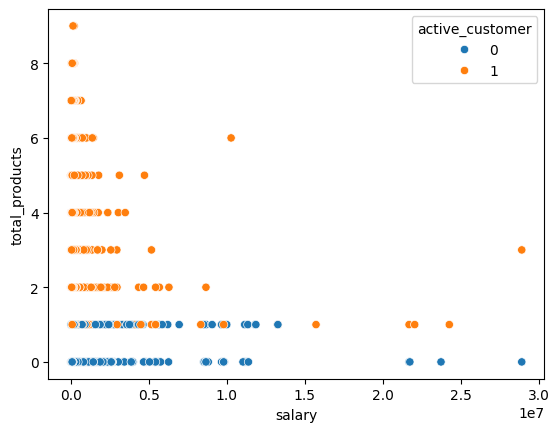

In [ ]:
sns.scatterplot(data=df_last_pkcid, x='salary', y='total_products', hue='active_customer')

Los clientes activos tienen más productos comprados.

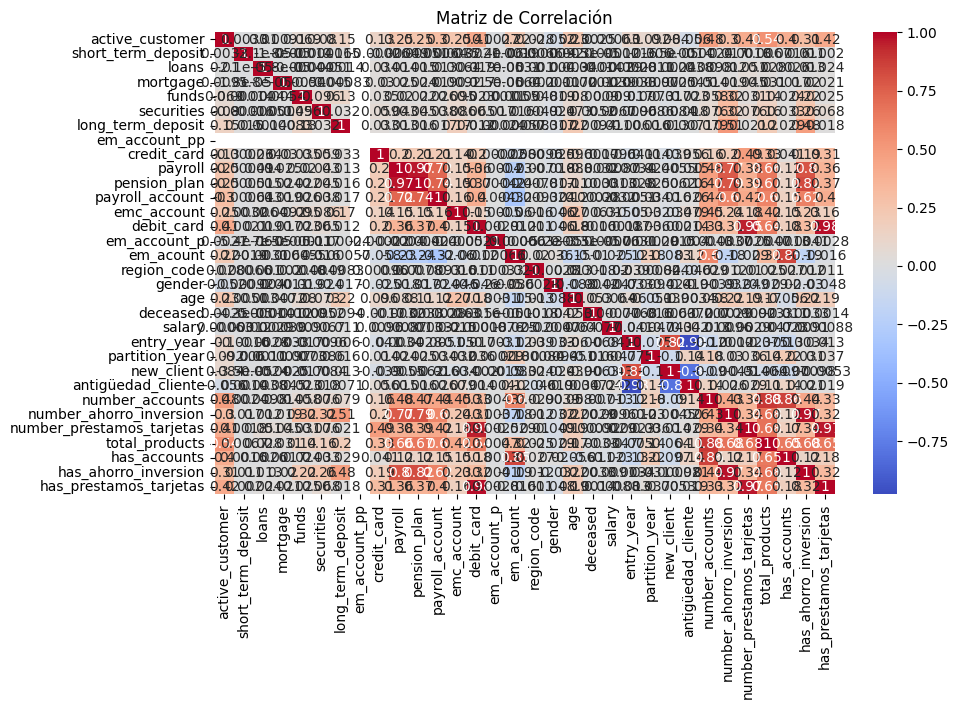

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_last_pkcid.select_dtypes('number').corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

## Productos vendidos en cada mes

Como ya hemos dicho, los registros se actualizan cada mes aunque no haya cambios, duplicando los productos. Así que nos es difícil saber cuántos productos se ha vendido cada mes con el dataset que tenemos ahora.

 Para intentar sacar la primera fecha en la que el cliente adquiere un producto, necesitamos definir otro dataframe.

In [ ]:
import pandas as pd
df_base=pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/Proyecto_Final/df_base3.pkl')

In [ ]:
# Sort by customer ID, partition, and entry date
df_aux=df_base.sort_values(by=["pk_cid", "pk_partition"])

# Identify the first entry of each product for each customer
first_product_entries = []
for product in product_columns:
    first_entries = df_aux[df_aux[product] != 0].groupby("pk_cid").first().reset_index()
    first_entries["product"] = product  # Track which product was first
    first_product_entries.append(first_entries)

# Concatenate all first product entries
filtered_df = pd.concat(first_product_entries).sort_values(by=["pk_cid", "pk_partition"])

In [ ]:
filtered_df=filtered_df[['pk_cid','pk_partition','product']]
filtered_df

pk_cid pk_partition      product
0         15891   2018-07-28    em_acount
1         16203   2019-01-28    em_acount
2         16502   2018-10-28    em_acount
0         16502   2019-01-28  emc_account
3         17457   2018-01-28    em_acount
...         ...          ...          ...
332723  1553456   2019-05-28    em_acount
332724  1553541   2019-05-28    em_acount
332725  1553559   2019-05-28    em_acount
332726  1553565   2019-05-28    em_acount
332727  1553571   2019-05-28    em_acount

[537386 rows x 3 columns]

Se obtiene una columna nueva `product`, que indica para cada fecha y pkcid, el producto que se ha llevado.

In [ ]:
filtered_df.reset_index(drop=True, inplace=True)

In [ ]:
#Se aplica un one hot mediante get_dummies
filtered_df=pd.get_dummies(filtered_df, columns=['product'])
#Un dataframe nuevo sobre la venta mensual
filtered_month_df=filtered_df.select_dtypes(include=['bool']).groupby(filtered_df['pk_partition']).sum()

#Total mensual
filtered_month_df['total_products']=filtered_month_df.sum(axis=1)
filtered_month_df.reset_index(inplace=True)

In [ ]:
#Total por grupo de producto
account_cols=['product_payroll_account', 'product_emc_account', 'product_em_account_p', 'product_em_acount','product_payroll']
ahorro_cols=['product_short_term_deposit','product_funds', 'product_securities', 'product_long_term_deposit','product_pension_plan']
tarjetas_cols=['product_credit_card', 'product_debit_card','product_loans', 'product_mortgage']
filtered_month_df['total_accounts']=filtered_month_df[account_cols].sum(axis=1)
filtered_month_df['total_ahorro']=filtered_month_df[ahorro_cols].sum(axis=1)
filtered_month_df['total_tarjetas']=filtered_month_df[tarjetas_cols].sum(axis=1)

In [ ]:
filtered_month_df  #Visualización en PowerBI

pk_partition  product_credit_card  product_debit_card  \
0    2018-01-28                 3325               24696   
1    2018-02-28                  510                3708   
2    2018-03-28                  551                2691   
3    2018-04-28                  400                2122   
4    2018-05-28                  373                1804   
5    2018-06-28                  406                1834   
6    2018-07-28                  390                1942   
7    2018-08-28                  331                1943   
8    2018-09-28                  281                2514   
9    2018-10-28                  287                3426   
10   2018-11-28                  259                2908   
11   2018-12-28                  221                2483   
12   2019-01-28                  215                2160   
13   2019-02-28                  248                2537   
14   2019-03-28                  249                2590   
15   2019-04-28                  236                2129   
16   2019-05-28                  249                2049   

    product_em_account_p  product_em_acount  product_emc_account  \
0                      2             215293                15320   
1                      0               4156                  807   
2                      0               3521                  786   
3                      0               3004                  705   
4                      0               3065                  712   
5                      0               4711                  561   
6                      0              12439                  403   
7                      0              14129                  339   
8                      0              17513                  474   
9                      0              18988                  447   
10                     0              10517                  799   
11                     0               6223                  767   
12                     0               5137                 1017   
13                     0               3952                 1066   
14                     0               4210                  878   
15                     0               3012                 1113   
16                     0               2858                 1449   

    product_funds  product_loans  product_long_term_deposit  product_mortgage  \
0             786             19                       4884                15   
1              97              0                        225                 0   
2             118              4                        249                 2   
3             124              3                        230                 1   
4              81              3                        340                 1   
5              51              0                        371                 1   
6              52              1                        417                 1   
7              58              2                        312                 0   
8              34              2                        450                 0   
9              37              2                        453                 0   
10             50              0                        338                 0   
11             56              1                        410                 0   
12             34              1                        178                 1   
13             25              1                        192                 0   
14             20              3                         50                 0   
15             26              2                         10                 3   
16             17              0                          2                 0   

    product_payroll  product_payroll_account  product_pension_plan  \
0              8145                    13478                  8835   
1              1966                      974                  2006   
2              1080         

In [ ]:
# filtered_month_df.to_pickle('filtered_month_df.pkl')
# filtered_month_df.to_csv('filtered_month_df.csv')

# Mapa de ubicaciones de `country_id`

Creando un dataframe que corresponde a las lalitudes y longitudes de cada país, permite mostrar visualmente la ubicación en un mapa.

In [ ]:
country_coords = {
    'ES': (40.46367, -3.74922),    # España
    'GB': (55.37805, -3.43597),    # Reino Unido
    'US': (37.09024, -95.71289),   # Estados Unidos
    'FR': (46.60335, 1.88833),     # Francia
    'CH': (46.81819, 8.22751),     # Suiza
    'DE': (51.16569, 10.45153),    # Alemania
    'BE': (50.50389, 4.46994),     # Bélgica
    'BR': (-14.23500, -51.92528),  # Brasil
    'MX': (23.63450, -102.55278),  # México
    'VE': (6.42375, -66.58973),    # Venezuela
    'AR': (-38.41610, -63.61667),  # Argentina
    'PL': (51.91944, 19.14514),    # Polonia
    'IE': (53.14237, -7.69205),    # Irlanda
    'AT': (47.51623, 14.55007),    # Austria
    'IT': (41.87194, 12.56738),    # Italia
    'SE': (60.12816, 18.64350),    # Suecia
    'CL': (-35.67515, -71.54297),  # Chile
    'CN': (35.86166, 104.19540),   # China
    'MA': (31.79170, -7.09262),    # Marruecos
    'CA': (56.13037, -106.34677),  # Canadá
    'CI': (7.53999, -5.54708),     # Costa de Marfil
    'CM': (7.36972, 12.35472),     # Camerún
    'DZ': (28.03389, 1.65963),     # Argelia
    'ET': (9.14500, 40.48967),     # Etiopía
    'CO': (4.57087, -74.29733),    # Colombia
    'JM': (18.10958, -77.29751),   # Jamaica
    'HU': (47.16249, 19.50330),    # Hungría
    'GA': (-0.80369, 11.60944),    # Gabón
    'GT': (15.78347, -90.23076),   # Guatemala
    'DJ': (11.82514, 42.59028),    # Yibuti
    'DO': (18.73569, -70.16265),   # República Dominicana
    'MR': (21.00789, -10.94084),   # Mauritania
    'LU': (49.81527, 6.12958),     # Luxemburgo
    'PT': (39.39987, -8.22445),    # Portugal
    'PE': (-9.18997, -75.01515),   # Perú
    'NO': (60.47202, 8.46895),     # Noruega
    'QA': (25.35483, 51.18388),    # Catar
    'SA': (23.88594, 45.07916),    # Arabia Saudita
    'RU': (61.52401, 105.31876),   # Rusia
    'RO': (45.94316, 24.96676),    # Rumania
    'SN': (14.49740, -14.45236),   # Senegal
}


# Crea un DataFrame a partir del diccionario
df_country_coords = pd.DataFrame.from_dict(country_coords, orient='index', columns=['latitude', 'longitude'])
df_country_coords.index.name = 'country_id'

# Muestra el DataFrame
pd.options.display.float_format = '{:.5f}'.format
df_country_coords

latitude  longitude
country_id                     
ES          40.46367   -3.74922
GB          55.37805   -3.43597
US          37.09024  -95.71289
FR          46.60335    1.88833
CH          46.81819    8.22751
DE          51.16569   10.45153
BE          50.50389    4.46994
BR         -14.23500  -51.92528
MX          23.63450 -102.55278
VE           6.42375  -66.58973
AR         -38.41610  -63.61667
PL          51.91944   19.14514
IE          53.14237   -7.69205
AT          47.51623   14.55007
IT          41.87194   12.56738
SE          60.12816   18.64350
CL         -35.67515  -71.54297
CN          35.86166  104.19540
MA          31.79170   -7.09262
CA          56.13037 -106.34677
CI           7.53999   -5.54708
CM           7.36972   12.35472
DZ          28.03389    1.65963
ET           9.14500   40.48967
CO           4.57087  -74.29733
JM          18.10958  -77.29751
HU          47.16249   19.50330
GA          -0.80369   11.60944
GT          15.78347  -90.23076
DJ          11.82514   42.59028
DO          18.73569  -70.16265
MR          21.00789  -10.94084
LU          49.81527    6.12958
PT          39.39987   -8.22445
PE          -9.18997  -75.01515
NO          60.47202    8.46895
QA          25.35483   51.18388
SA          23.88594   45.07916
RU          61.52401  105.31876
RO          45.94316   24.96676
SN          14.49740  -14.45236

In [ ]:
merged_df = pd.merge(df_last_pkcid, df_country_coords, on='country_id', how='left')

In [ ]:
merged_df

pk_cid pk_partition entry_date entry_channel  active_customer  \
0        635756   2018-07-28 2016-11-12           KAT                1   
1        606127   2018-07-28 2016-12-03           KFA                0   
2        611844   2018-07-28 2018-07-15       Unknown                0   
3        543177   2018-07-28 2016-12-26       Unknown                0   
4        528596   2018-07-28 2018-07-08       Unknown                0   
...         ...          ...        ...           ...              ...   
456368  1166765   2019-05-28 2016-08-14           KHE                0   
456369  1166764   2019-05-28 2016-08-14           KHE                0   
456370  1166763   2019-05-28 2016-08-14           KHE                1   
456371  1166789   2019-05-28 2016-08-14           KHE                0   
456372  1550586   2019-05-28 2019-05-13       Unknown                1   

                   segment  short_term_deposit  loans  mortgage  funds  ...  \
0        02 - PARTICULARES                   0      0         0      0  ...   
1                  Unknown                   0      0         0      0  ...   
2                  Unknown                   0      0         0      0  ...   
3                  Unknown                   0      0         0      0  ...   
4                  Unknown                   0      0         0      0  ...   
...                    ...                 ...    ...       ...    ...  ...   
456368  03 - UNIVERSITARIO                   0      0         0      0  ...   
456369  03 - UNIVERSITARIO                   0      0         0      0  ...   
456370   02 - PARTICULARES                   0      0         0      0  ...   
456371  03 - UNIVERSITARIO                   0      0         0      0  ...   
456372             Unknown                   0      0         0      0  ...   

        antigüedad_cliente  number_accounts  number_ahorro_inversion  \
0                      623                0                        0   
1                      602                0                        0   
2                       13                0                        0   
3                      579                0                        0   
4                       20                0                        0   
...                    ...              ...                      ...   
456368                1017                1                        0   
456369                1017                1                        0   
456370                1017                1                        0   
456371                1017                1                        0   
456372                  15                1                        0   

        number_prestamos_tarjetas  total_products  has_accounts  \
0                               0               0             0   
1                               0               0             0   
2                               0               0             0   
3                               0               0             0   
4                               0               0             0   
...                           ...             ...           ...   
456368                          0               1             1   
456369                          0               1             1   
456370                          0               1             1   
456371                          0               1             1   
456372                          0               1             1   

        has_ahorro_inversion  has_prestamos_tarjetas  latitude  longitude  
0                          0                       0  40.46367   -3.74922  
1                          0                       0  40.46367   -3.74922  
2                          0                       0  40.46367   -3.74922  
3                          0                       0  40.46367   -3.74922  
4                          0                       0  40.46367   -3.74922  
...                      ...                 